# Strength of Friendship Paradox - Twitter Script
This notebook processes Twitter @mention networks from Park et al. (2018). 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from itertools import chain
from collections import Counter
from math import log10
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
d_name = 'SG_edgelist.bz2'
df = pd.read_csv('data/'+d_name, compression="bz2", sep="\t")

In [3]:
df

node1   node2  range  f12  f21  geodist
0         82949  160291    2.0   17   10      4.2
1        175650  160291    2.0    7    5      NaN
2        332107  160291    2.0    4    7      6.4
3        306385  160291    3.0  111    7      NaN
4         47298  160291    3.0    1    1      NaN
...         ...     ...    ...  ...  ...      ...
3031001  378977  254946    2.0    4    4      NaN
3031002    2181  326316    2.0  140  203      NaN
3031003  154752  395150    5.0    1   30      NaN
3031004  125116   86190    2.0    5    3      NaN
3031005  211831  316550    2.0   78   67      NaN

[3031006 rows x 6 columns]

In [4]:
# create an average weigth variable
df['w'] = (df['f12']+df['f21'])/2

# create an absolute weight difference variable
df['d'] = abs(df['f12']-df['f21'])

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

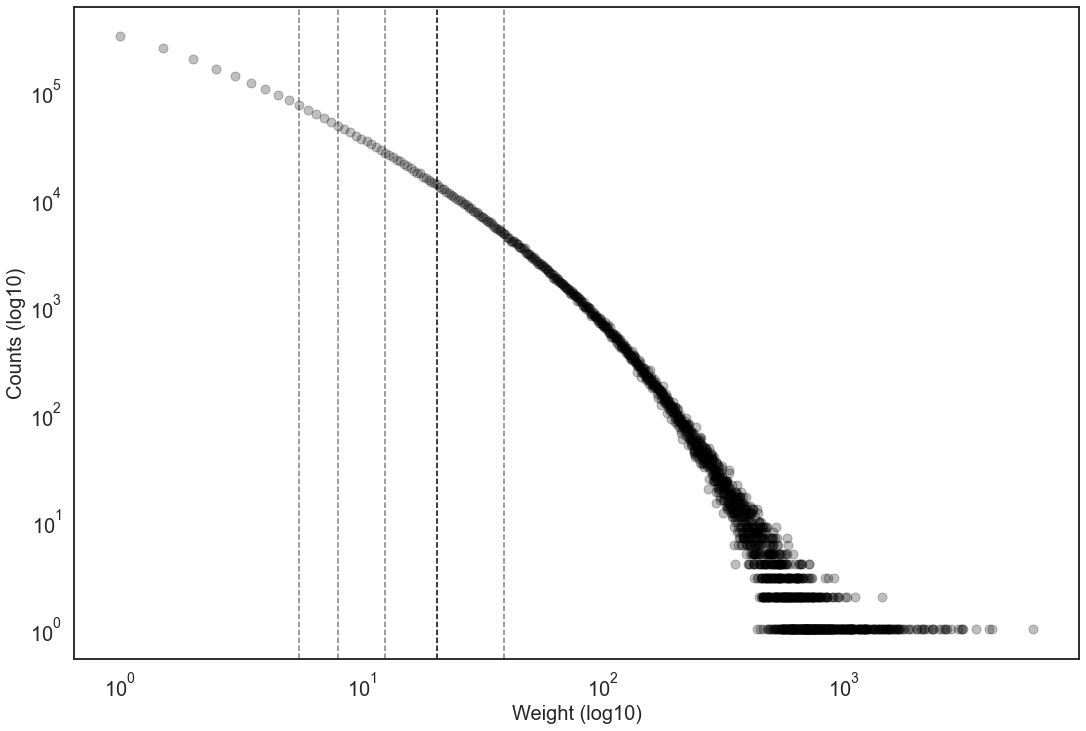

In [5]:
# creae the weight distribution
dist_df = pd.DataFrame(list(Counter(df.w).items()))
# dist_df = dist_df.applymap(log10)
dist_df.columns = ["weight", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="weight", y="counts", data=dist_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=df['w'].quantile(.5),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.6),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.7),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.8),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.9),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Weight (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# # g.set_axis_labels("weight (log10)", "counts (log10)")

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

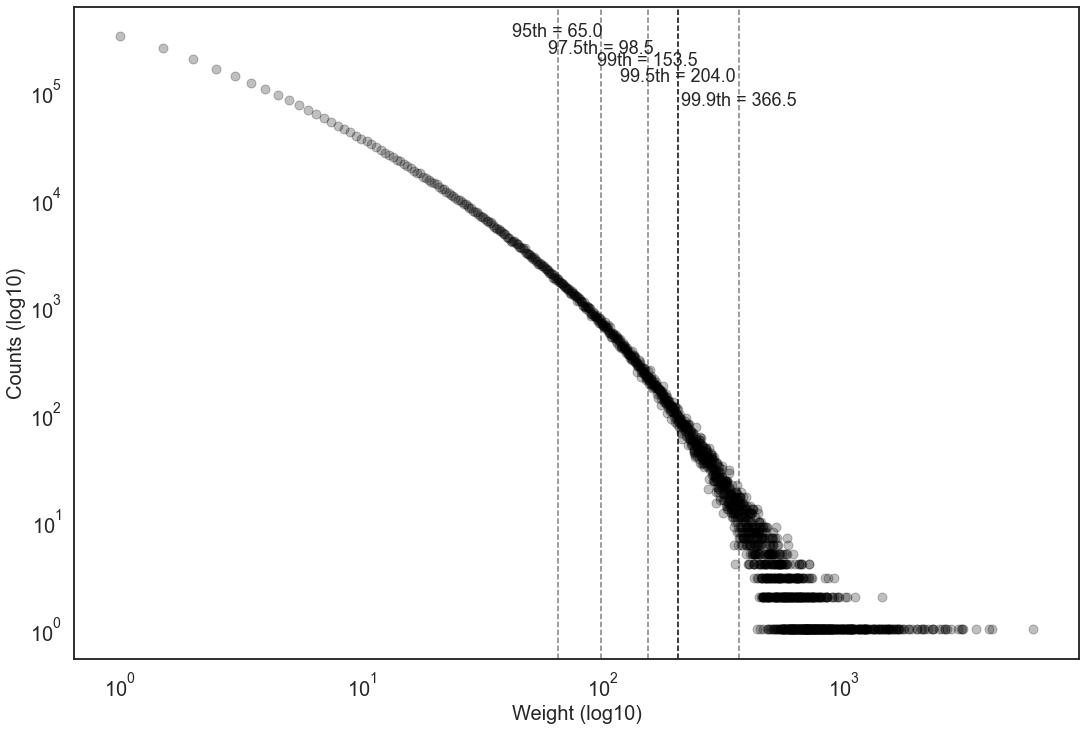

In [61]:
# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="weight", y="counts", data=dist_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=df['w'].quantile(.95),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.95),dist_df['counts'].max(), '95th = {:.1f}'.format(df['w'].quantile(.95)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.975),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.975),dist_df['counts'].max()-100000, '97.5th = {:.1f}'.format(df['w'].quantile(.975)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.99),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.99),dist_df['counts'].max()-150000, '99th = {:.1f}'.format(df['w'].quantile(.99)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.995),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.995),dist_df['counts'].max()-200000, '99.5th = {:.1f}'.format(df['w'].quantile(.995)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.999),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.999),dist_df['counts'].max()-250000, '99.9th = {:.1f}'.format(df['w'].quantile(.999)),fontsize=18,ha='center')
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Weight (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

## FP Calculation for Different Cutoffs

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

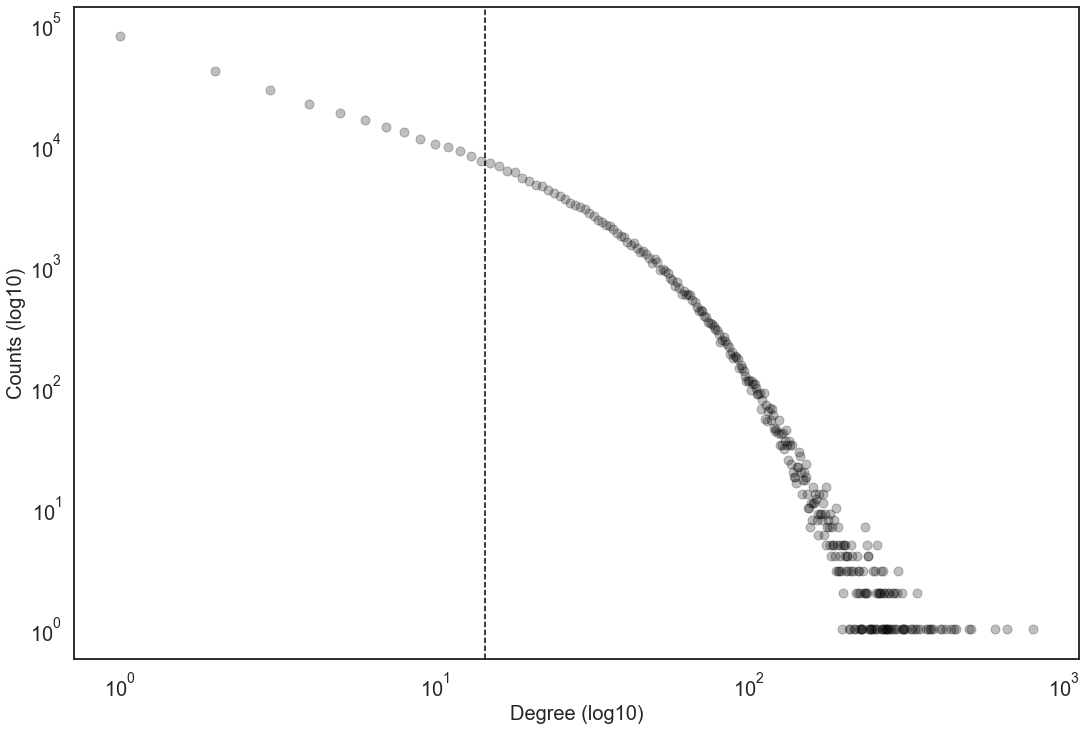

In [6]:
# degree distribution
A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
A_degree.columns = ["node", "degree"]
A_df = pd.DataFrame(list(Counter(A_degree.degree).items()))
A_df.columns = ["degree", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="degree", y="counts", data=A_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=A_degree['degree'].mean(),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [31]:
# number of unique users
len(A_degree.index)

419750

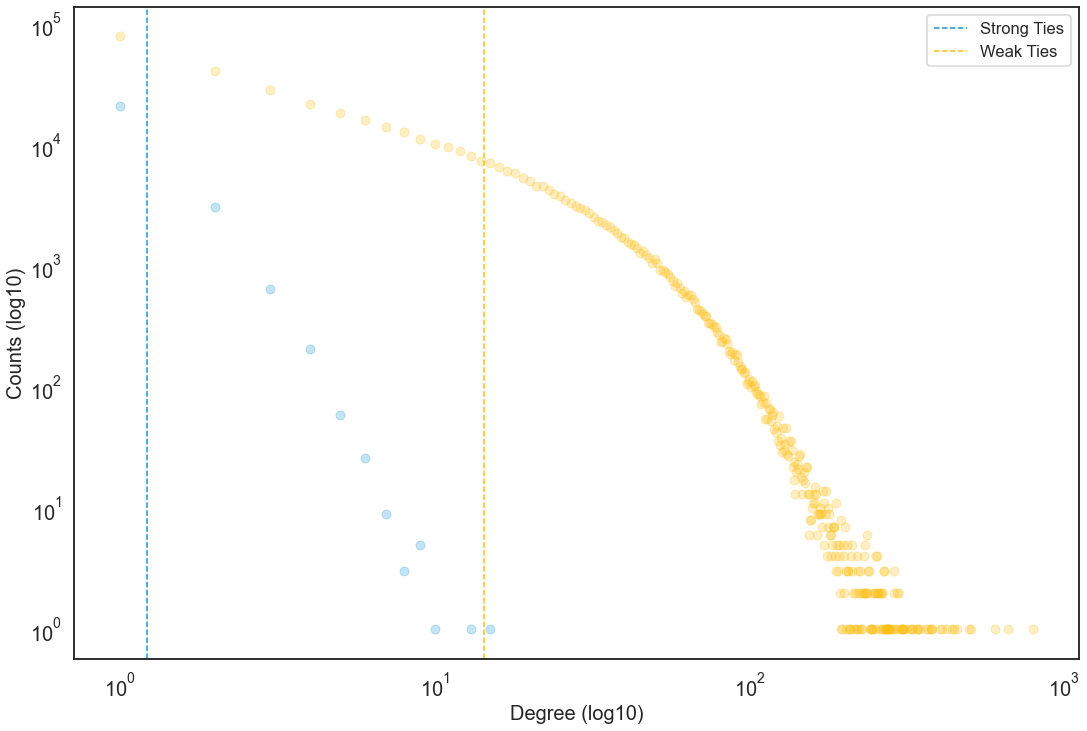

In [16]:
# set up a cutoff by quantile
cutoff = df['w'].quantile(.995)
# separate Strong vs. Weak
S_df = df.loc[df.w >= cutoff,:]
W_df = df.loc[df.w < cutoff,:]

# degree calculaion
S_degree = pd.DataFrame(list(Counter(S_df.loc[:,'node1'].append(S_df.loc[:,'node2'])).items()))
S_degree.columns = ["node", "degree"]
S_df = pd.DataFrame(list(Counter(S_degree.degree).items()))
S_df.columns = ["degree", "counts"]
W_degree = pd.DataFrame(list(Counter(W_df.loc[:,'node1'].append(W_df.loc[:,'node2'])).items()))
W_degree.columns = ["node", "degree"]
W_df = pd.DataFrame(list(Counter(W_degree.degree).items()))
W_df.columns = ["degree", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
sns.regplot(x="degree", y="counts", data=S_df,fit_reg=False, 
            color = '#1696d2', scatter_kws={'alpha':0.25})
plt.axvline(x=S_degree['degree'].mean(),
            color= '#1696d2',
            ls='--', 
            lw=1.5)
sns.regplot(x="degree", y="counts", data=W_df,fit_reg=False, 
            color = '#fdbf11', scatter_kws={'alpha':0.25})
plt.axvline(x=W_degree['degree'].mean(),
            color= '#fdbf11',
            ls='--', 
            lw=1.5)
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc='upper right', labels=['Strong Ties', 'Weak Ties'])

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

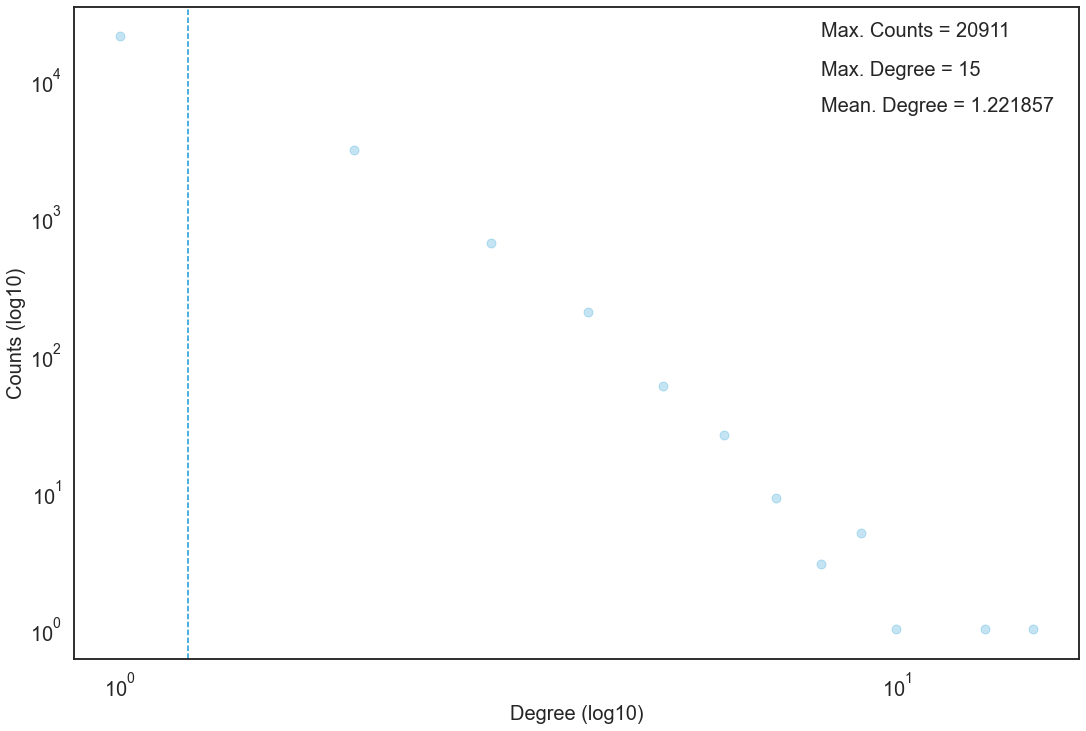

In [29]:
# plot strong tie only
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
sns.regplot(x="degree", y="counts", data=S_df,fit_reg=False, 
            color = '#1696d2', scatter_kws={'alpha':0.25})
plt.axvline(x=S_degree['degree'].mean(),
            color= '#1696d2',
            ls='--', 
            lw=1.5)
plt.text(8,S_df['counts'].max(), 'Max. Counts = {:g}'.format(S_df['counts'].max()),fontsize=20)
plt.text(8,S_df['counts'].max()-10000, 'Max. Degree = {:g}'.format(S_df['degree'].max()),fontsize=20)
plt.text(8,S_df['counts'].max()-15000, 'Mean. Degree = {:2f}'.format(S_degree['degree'].mean()),fontsize=20)
# sns.regplot(x="degree", y="counts", data=W_df,fit_reg=False, 
#             color = '#fdbf11', scatter_kws={'alpha':0.25})
# plt.axvline(x=W_degree['degree'].mean(),
#             color= '#fdbf11',
#             ls='--', 
#             lw=1.5)
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.legend(loc='upper right', labels=['Strong Ties', 'Weak Ties'])

In [32]:
# number of unique users in strong ties
len(S_degree.index)

24980

In [45]:
def FP(df):
    '''calculate the strength of FP index'''
    fp = 1 + df['std']/df['mean']**2
    return(fp)

def summary_stat(percent = .5):
    '''
    calculate summary degree stat
    input: percent e.g., .5, .6, 1
    '''
    cutoff = df['w'].quantile(percent)
    # calculate Mean and SD
    def sum_stat(degree_df):
        sum_df = degree_df.agg({'degree':['mean','std','min','max']})
        sum_df = sum_df.T.reset_index(drop=True)
        return(sum_df)
    # separate cases
    if percent == 1:
        # degree calculation
        A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
        A_degree.columns = ["node", "degree"]
        sum_df = sum_stat(A_degree)
        sum_df['type'] = 'All'
        sum_S['n'] = len(A_degree.index)
        sum_df['n%'] = len(A_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
    else:
        # separate Strong vs. Weak
        S_df = df.loc[df.w >= cutoff,:]
        W_df = df.loc[df.w < cutoff,:]
        # degree calculaion
        S_degree = pd.DataFrame(list(Counter(S_df.loc[:,'node1'].append(S_df.loc[:,'node2'])).items()))
        S_degree.columns = ["node", "degree"]
        W_degree = pd.DataFrame(list(Counter(W_df.loc[:,'node1'].append(W_df.loc[:,'node2'])).items()))
        W_degree.columns = ["node", "degree"]
        sum_S = sum_stat(S_degree)
        sum_S['type'] = 'Strong'
        sum_W = sum_stat(W_degree)
        sum_W['type'] = 'Weak'
        sum_S['n'] = len(S_degree.index)
        sum_W['n'] = len(W_degree.index)
        sum_S['n%'] = len(S_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
        sum_W['n%'] = len(W_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
        sum_df = sum_S.append(sum_W)
    # add extra info
    sum_df['percentile'] = percent
    sum_df['cutoff'] = cutoff
    sum_df['country'] = d_name.split(sep='_')[0]
    return(sum_df)

In [8]:
df['w'].quantile(.99)

153.5

Here, I calculate descriptive statistics by different cutoff.

In [48]:
# stat_df = pd.concat([summary_stat(percent = x) for x in [.5,.6,.7,.8,.9,1]])
stat_df = pd.concat([summary_stat(percent = x) for x in [.90,.95,.975,.99,.995,.999]])

In [49]:
stat_df['FP'] = FP(stat_df)
stat_df

mean        std  min    max    type       n         n%  percentile  \
0   3.173522   2.851740  1.0  107.0  Strong  192840  45.941632       0.900   
0  13.101727  18.468249  1.0  771.0    Weak  415978  99.101370       0.900   
0   2.190458   1.782172  1.0   71.0  Strong  139432  33.217868       0.950   
0  13.778575  19.291333  1.0  784.0    Weak  417793  99.533770       0.950   
0   1.669130   1.192420  1.0   54.0  Strong   90809  21.634068       0.975   
0  14.117619  19.683552  1.0  791.0    Weak  418657  99.739607       0.975   
0   1.341999   0.784515  1.0   29.0  Strong   45234  10.776415       0.990   
0  14.315073  19.894779  1.0  794.0    Weak  419230  99.876117       0.990   
0   1.221857   0.604852  1.0   15.0  Strong   24980   5.951161       0.995   
0  14.380789  19.958106  1.0  797.0    Weak  419413  99.919714       0.995   
0   1.104114   0.374999  1.0    5.0  Strong    5494   1.308874       0.999   
0  14.430773  19.998982  1.0  798.0    Weak  419655  99.977367       0.999   

   cutoff country        FP  
0    39.0      SG  1.283157  
0    39.0      SG  1.107589  
0    65.0      SG  1.371432  
0    65.0      SG  1.101614  
0    98.5      SG  1.428005  
0    98.5      SG  1.098760  
0   153.5      SG  1.435609  
0   153.5      SG  1.097085  
0   204.0      SG  1.405143  
0   204.0      SG  1.096506  
0   366.5      SG  1.307611  
0   366.5      SG  1.096035

## Calculate FP for Each Country

In [92]:
import os
# create a list of bz2 files
bz2_list = [x for x in os.listdir('./data/') if x.endswith(".bz2")]
print(bz2_list)

# parse data to calculate FP
def country_stat(num_country):
    # read data
    d_name = bz2_list[num_country]
    df = pd.read_csv('data/'+d_name, compression="bz2", sep="\t")
    # calculate basic stat
    stat_df = pd.concat([summary_stat(percent = x) for x in [.5,.6,.7,.8,.9,1]])
    # calculate FP
    stat_df['FP'] = FP(stat_df)
    return(stat_df)

In [93]:
bz2_list

['FR_edgelist.bz2',
 'GB_edgelist.bz2',
 'JP_edgelist.bz2',
 'KR_edgelist.bz2',
 'NL_edgelist.bz2',
 'SG_edgelist.bz2',
 'TR_edgelist.bz2',
 'US_edgelist.bz2']

In [95]:
# create a summary stat table includes all the data
stat_df = pd.concat([country_stat(num_country = x) for x in range(len(bz2_list))])
# save it as a csv table
stat_df.to_csv('summary_twitter.csv', sep ='\t')

MemoryError: Unable to allocate 10.2 GiB for an array with shape (4, 343633442) and data type int64